<a href="https://colab.research.google.com/github/Suchirapon/data_viz/blob/main/Visualize_Data_Comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from google.colab import drive #เชื่อมต่อ google.colab กับ drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os #ทำงานเกี่ยวกับการจัดการไฟล์ 
path = '/content/drive/My Drive/dataviz_2021_data'

In [3]:
search_df = os.path.join(path,'search_request.csv')

In [4]:
data = pd.read_csv(search_df) 
data.head(2)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7,8,9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,search_id,search_timestamp,user_agent,q,user_id,session_id,number_of_result,lat,long
0,0,683de889-f923-494e-9d46-44a3d67b7259,2018-06-14 12:34:35.449,"Wongnai/8.17.3 rv:8.17.3.3921 (iPhone5,4; iOS;...",NaN,NaN,5lqjjikta19d296mo7g2h1k86p,18,12.6347,101.463
1,1,4a811230-ffa4-4631-a4c8-5d0394137d02,2018-06-14 17:11:19.469,Mozilla/5.0 (iPhone; CPU iPhone OS 11_4 like M...,NaN,NaN,1r3iotmp0o9slom91stdt9vivc,10,14.8009,102.534


# เตรียมข้อมูล

### แปลงข้อมูลบอกเวลาให้เป็นตัวแปรชนิด datetime

In [5]:
from datetime import datetime,time as dt

In [6]:
data['search_timestamp']  = pd.to_datetime(data['search_timestamp'],format='%Y-%m-%d %H:%M:%S',errors='coerce')

# Bar Chart (กราฟแท่ง)

### สร้างกราฟแท่งเปรียบเทียบปริมาณ คนเข้าใช้ web Wongnai.com เพื่อคนหาร้านอาหาร ในแต่ละวัน 

quiz 6

In [7]:
 from matplotlib import pyplot as plt

### ส่วนประกอบกราฟแท่ง

- ตัวกราฟแท่ง (height)
- ตำแหน่งกราฟแท่ง (X)
- ชื่อแท่ง (tick_label)
- ชื่อกราฟ (plt.title)
- ชื่อแกน x (plt.xlabel)
- ชื่อแกน y (plt.ylabel)

### การแสดงภาษาไทยในกราฟ 
- https://medium.com/@kanyawee.work/%E0%B9%81%E0%B8%AA%E0%B8%94%E0%B8%87%E0%B8%9C%E0%B8%A5%E0%B8%A0%E0%B8%B2%E0%B8%A9%E0%B8%B2%E0%B9%84%E0%B8%97%E0%B8%A2%E0%B9%83%E0%B8%99%E0%B8%81%E0%B8%A3%E0%B8%B2%E0%B8%9F%E0%B8%82%E0%B8%AD%E0%B8%87-matplotlib-%E0%B8%9A%E0%B8%99-google-colab-37210d9a9f31

In [8]:
!wget -q https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf

In [9]:
import matplotlib as mpl 
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')
mpl.rc('font', family='TH Sarabun New')

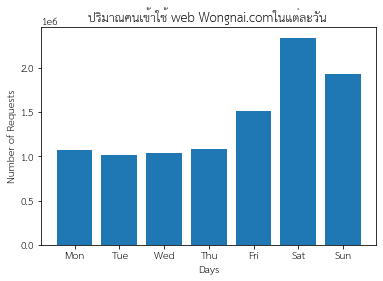

In [10]:
plt.bar([1,2,3,4,5,6,7],[data[data['search_timestamp'].dt.dayofweek == 0].shape[0],
                                data[data['search_timestamp'].dt.dayofweek == 1].shape[0],
                                data[data['search_timestamp'].dt.dayofweek == 2].shape[0],
                                data[data['search_timestamp'].dt.dayofweek == 3].shape[0],
                                data[data['search_timestamp'].dt.dayofweek == 4].shape[0],
                                data[data['search_timestamp'].dt.dayofweek == 5].shape[0],
                                data[data['search_timestamp'].dt.dayofweek == 6].shape[0],
                                ],tick_label=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
plt.xlabel('Days')
plt.ylabel('Number of Requests')
plt.title('ปริมาณคนเข้าใช้ web Wongnai.comในแต่ละวัน ');

# Grouped bar chart

### แสดงปริมาณคนเข้า web ในแต่ละวัน โดยเปรียบเทียบช่วงเวลา 11.00 - 12.00 กับ 23.00 - 24.00 

In [12]:
from datetime import datetime as dt
from datetime import time

In [13]:
data[(data['search_timestamp'].dt.dayofweek == 0) 
& (data['search_timestamp'].dt.time < time(hour=12)) 
& (data['search_timestamp'].dt.time >= time(hour=11))].shape[0]  # monday 11:00-12:00

73249

In [14]:
b4lunch = [data[(data['search_timestamp'].dt.dayofweek == 0)&(data['search_timestamp'].dt.time < time(hour=12))&(data['search_timestamp'].dt.time >= time(hour=11))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 1)&(data['search_timestamp'].dt.time < time(hour=12))&(data['search_timestamp'].dt.time >= time(hour=11))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 2)&(data['search_timestamp'].dt.time < time(hour=12))&(data['search_timestamp'].dt.time >= time(hour=11))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 3)&(data['search_timestamp'].dt.time < time(hour=12))&(data['search_timestamp'].dt.time >= time(hour=11))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 4)&(data['search_timestamp'].dt.time < time(hour=12))&(data['search_timestamp'].dt.time >= time(hour=11))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 5)&(data['search_timestamp'].dt.time < time(hour=12))&(data['search_timestamp'].dt.time >= time(hour=11))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 6)&(data['search_timestamp'].dt.time < time(hour=12))&(data['search_timestamp'].dt.time >= time(hour=11))].shape[0]
                         ]

In [15]:
b4lunch

[73249, 73083, 75429, 78024, 99007, 174165, 165440]

In [16]:
data[(data['search_timestamp'].dt.dayofweek == 0)&(data['search_timestamp'].dt.time >= time(hour=23))].shape[0]

31874

In [17]:
b4midnight = [data[(data['search_timestamp'].dt.dayofweek == 0)&(data['search_timestamp'].dt.time >= time(hour=23))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 1)&(data['search_timestamp'].dt.time >= time(hour=23))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 2)&(data['search_timestamp'].dt.time >= time(hour=23))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 3)&(data['search_timestamp'].dt.time >= time(hour=23))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 4)&(data['search_timestamp'].dt.time >= time(hour=23))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 5)&(data['search_timestamp'].dt.time >= time(hour=23))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 6)&(data['search_timestamp'].dt.time >= time(hour=23))].shape[0]
                         ]
b4midnight

[31874, 32258, 31153, 35944, 53174, 58306, 35801]

In [18]:
labels = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']

In [19]:
import numpy as np

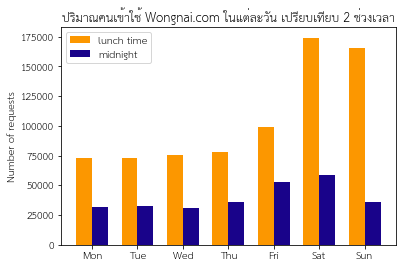

In [20]:
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, b4lunch, width, label='lunch time',color = '#fc9700') #SCML Color
rects2 = ax.bar(x + width/2, b4midnight, width, label='midnight',color = '#19038a')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of requests')
ax.set_title('ปริมาณคนเข้าใช้ Wongnai.com ในแต่ละวัน เปรียบเทียบ 2 ช่วงเวลา')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend();

# Stacked bar chart

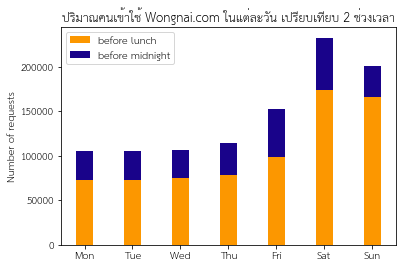

In [25]:
import matplotlib.pyplot as plt

width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(labels, b4lunch, width,  label='before lunch',color = '#fc9700')
ax.bar(labels, b4midnight, width,  bottom = b4lunch, label='before midnight',color = '#19038a')
# bottom = b4lunch คือ ให้เริ่มที่ b4lunch
ax.set_ylabel('Number of requests')
ax.set_title('ปริมาณคนเข้าใช้ Wongnai.com ในแต่ละวัน เปรียบเทียบ 2 ช่วงเวลา')
ax.legend()

plt.show()

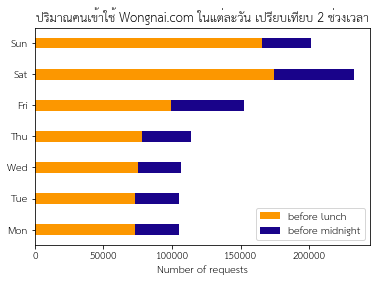

In [33]:
width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.barh(labels,  b4lunch,width,  label='before lunch',color = '#fc9700')
ax.barh(labels, b4midnight, width,  left = b4lunch, label='before midnight',color = '#19038a')
# bottom = b4lunch คือ ให้เริ่มที่ b4lunch
ax.set_xlabel('Number of requests')
ax.set_title('ปริมาณคนเข้าใช้ Wongnai.com ในแต่ละวัน เปรียบเทียบ 2 ช่วงเวลา')
ax.legend()

plt.show()

## เช็คชื่อ โดยให้วาด Bar Chart ที่เปรียบเทียบปริมาณคนใช้งาน Wongnai . com สองช่วงเวลา โดยให้กราฟแสดงสัดส่วนของปริมาณคนใช้งานแต่ละวันด้วย

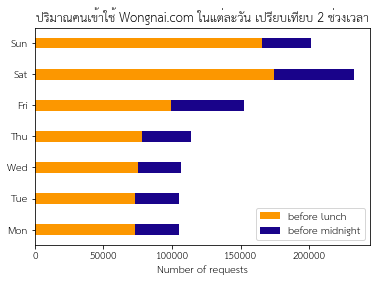

In [31]:
width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.barh(labels, b4lunch, width,  label='before lunch',color = '#fc9700')
ax.barh(labels, b4midnight, width,  left = b4lunch, label='before midnight',color = '#19038a')
# bottom = b4lunch คือ ให้เริ่มที่ b4lunch
ax.set_xlabel('Number of requests')
ax.set_title('ปริมาณคนเข้าใช้ Wongnai.com ในแต่ละวัน เปรียบเทียบ 2 ช่วงเวลา')
ax.legend()

plt.show()

# Histogram

นับความถี่ข้อมูลแล้วเอามา plot

In [34]:
np.random.seed(2021)
#seed จะ random ได้เลขเดียวกับกับทุกคน

In [35]:
np.random.randint(100)

85

In [36]:
np.random.randn(100) # จะแรนด้อม ที่ mu = 0 std = 1
# randn(100) random 100 จุด

array([-0.65278343,  0.42193173, -0.17383896, -0.20136597,  0.77039766,
        1.20160669, -0.19009954,  0.13407709, -0.75051215,  0.21162099,
        2.0448903 ,  1.07526774,  0.07902026,  0.49328237, -0.79136747,
       -2.13059519,  0.31720629, -1.36461749,  0.35842752, -1.30562426,
        2.02071843, -2.68680391,  0.55787157,  0.77617621,  0.20264991,
       -0.50735635,  1.05898217,  0.46323535,  0.49699852, -1.25014539,
       -1.51195802,  0.89457475,  0.24281041,  1.00678612, -0.04124402,
        0.34396583,  0.02548591, -1.07844433,  0.81565795, -0.13376737,
        0.61319221,  0.32808139,  1.7748439 ,  1.15295013,  1.02961911,
       -0.50175762, -1.09042286, -1.10397942, -0.64776684, -0.82386881,
       -0.97420544,  0.42570077,  1.59288883, -1.2010321 , -1.76059321,
       -0.8979381 , -0.21097685,  1.78542198,  0.31632373,  0.42776574,
        1.32762063,  0.42865209, -0.80177471, -1.40404436,  0.4366976 ,
        0.86278299, -0.48927924,  1.50419932, -1.05216008, -1.47

In [38]:
mu, sigma = 100, 15
X = mu + sigma * np.random.randn(10000)

In [39]:
X

array([106.27297175, 105.18679309,  87.6298573 , ..., 104.93498539,
        90.71739267,  98.11272785])

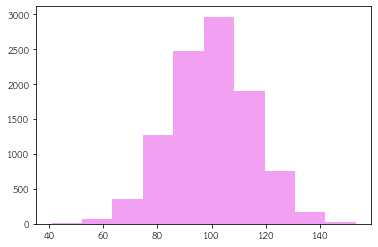

In [45]:
output = plt.hist(X, 10,  facecolor='violet', alpha=0.75);

In [46]:
output
# นับจำนวนสมาชิก เริ่มตั้ง 40.88463603 - 52.13062451 มีสามชิกทั้งหมด 13 ตัว

(array([  13.,   70.,  351., 1270., 2478., 2967., 1897.,  753.,  172.,
          29.]), array([ 40.88463603,  52.13062451,  63.376613  ,  74.62260148,
         85.86858997,  97.11457845, 108.36056694, 119.60655543,
        130.85254391, 142.0985324 , 153.34452088]), <a list of 10 Patch objects>)

# Plot Histogram 

In [52]:
data['number_of_result']

0           18
1           10
2            8
3           12
4           14
            ..
10004352    22
10004353    22
10004354    22
10004355    22
10004356    22
Name: number_of_result, Length: 10004357, dtype: object

In [ ]:
data[data['number_of_result']=='number_of_result']


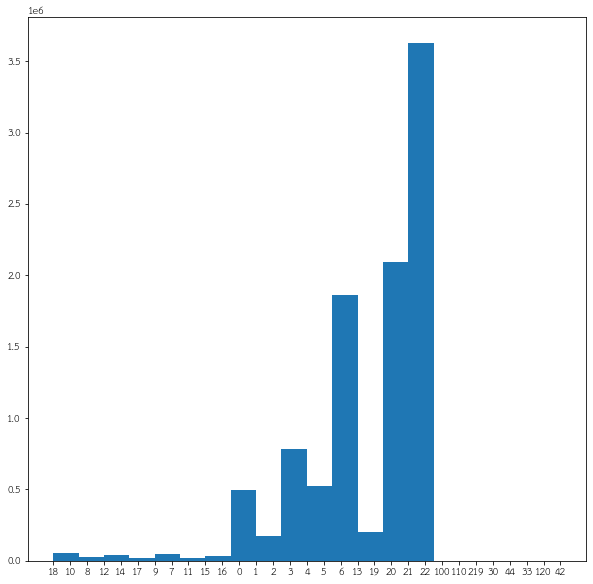

In [54]:
import matplotlib
matplotlib.rcParams['figure.figsize']=[10,10]
Y = plt.hist(list(data['number_of_result'].drop(1000016)),20)